[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1LW0GI832qnoir1z34Qarkswt0ILyEE4g)

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [2]:
def read_data(filename):
    """
    Reads data from the passed-in file, returning a pair of matrices (x, y)
    where each row x[i] is a d-dimensional training point with corresponding
    label y[i].
    """
    data = np.loadtxt(filename, comments='#', delimiter=',')
    # The first column of each row is the label y
    y = data[:,0]
    x = data[:,1:]
    # Add bias column
    x = np.append(x, np.ones((x.shape[0], 1)), axis=1)
    return (x, y)

In [3]:
import requests

url_dict = {
    'wine_training1.txt': 'https://drive.google.com/uc?export=download&id=178ewdrScC06GzCV5QzwLNLI6SYjdrGHP',
    'wine_training2.txt': 'https://drive.google.com/uc?export=download&id=16va8tYrEim6ODQo7HJq-oJ2Cd-eOITw2',
    'wine_validation.txt': 'https://drive.google.com/uc?export=download&id=1ml7m8HEeZABtNhgec6nJfb4kVLsFyxlx',
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [4]:
# Download files
download_file('wine_training1.txt')
download_file('wine_training2.txt')
download_file('wine_validation.txt')

# Read in training data
x1, y1 = read_data('wine_training1.txt')
x2, y2 = read_data('wine_training2.txt')

xvalid, yvalid = read_data('wine_validation.txt')

def normalize(data):
    means = np.mean(data[:, 1:], axis=0)
    std_devs = np.std(data[:, 1:], axis=0)
    std_devs[std_devs == 0] = 1
    data_normalized = data.copy()
    data_normalized[:, 1:] = (data[:, 1:] - means) / std_devs
    return data_normalized

x1 = normalize(x1)
x2 = normalize(x2)
xvalid = normalize(xvalid)

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


In [5]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    return np.mean(np.log(1 + np.exp(-1 * Y * np.dot(X, w))))


def gradient(x, y, w, l, N):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to w.
    '''
    return -y*x/(np.exp(y*np.dot(x, w))+1) + 2*l*w/N

def SGD(X, Y, w_start, eta, N_epochs, l, N_points):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''

    training_err = []
    w = np.copy(w_start)
    for _ in range(N_epochs):
      permutation = np.random.permutation(len(Y))
      X_shuffled = X[permutation]
      Y_shuffled = Y[permutation]
      for i in range(len(X)):
        x = X_shuffled[i]
        y = Y_shuffled[i]
        grad = gradient(x, y, w, l, N_points)
        w -= eta*grad
    return w

Text(0.5, 1.0, 'ℓ2 Norm of w vs λ for training set 1')

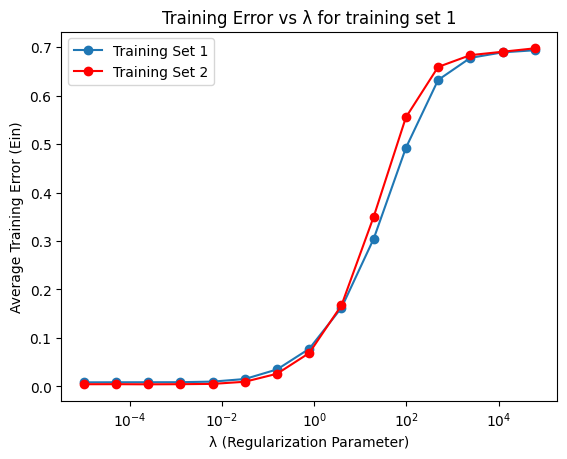

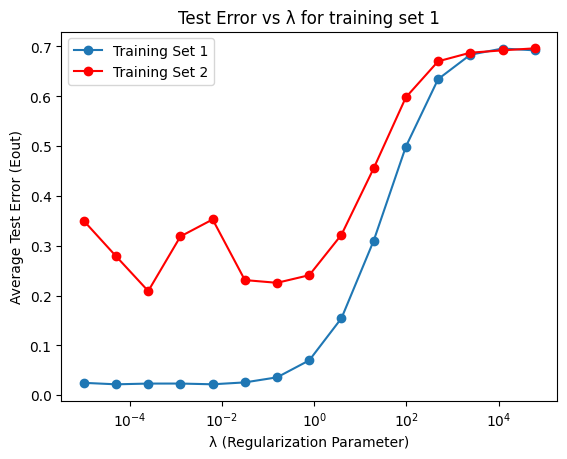

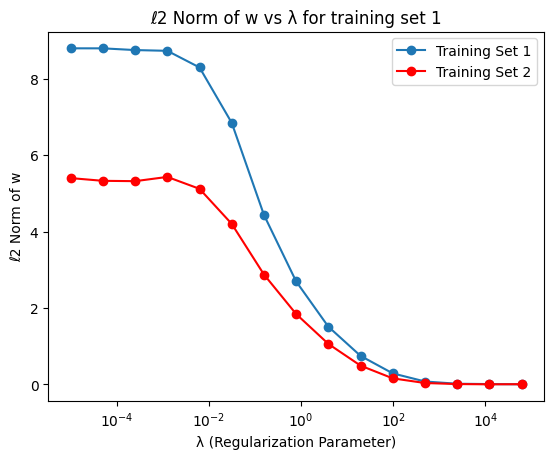

In [6]:
l0 = 0.00001
eta = 5*10**(-4)
epochs = 20000
in_err1 = []
out_err1 = []
l2_norm1 = []
in_err2 = []
out_err2 = []
l2_norm2 = []
lambdas = []
for _ in range(15):
  lambdas.append(l0)
  w_start = np.random.uniform(-1, 1, size=14)
  weights1 = SGD(x1, y1, w_start, eta, epochs, l0, len(y1))
  weights2 = SGD(x2, y2, w_start, eta, epochs, l0, len(y2))

  in_err1.append(loss(x1, y1, weights1))
  out_err1.append(loss(xvalid, yvalid, weights1))
  l2_norm1.append(np.linalg.norm(weights1))

  in_err2.append(loss(x2, y2, weights2))
  out_err2.append(loss(xvalid, yvalid, weights2))
  l2_norm2.append(np.linalg.norm(weights2))
  l0 *= 5



plt.figure()
plt.plot(lambdas, in_err1, marker='o')
plt.plot(lambdas, in_err2, marker='o', color='red')
plt.legend(['Training Set 1', 'Training Set 2'])
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Average Training Error (Ein)')
plt.title('Training Error vs λ for training set 1')

plt.figure()
plt.plot(lambdas, out_err1, marker='o')
plt.plot(lambdas, out_err2, marker='o', color='red')
plt.legend(['Training Set 1', 'Training Set 2'])
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Average Test Error (Eout)')
plt.title('Test Error vs λ for training set 1')

plt.figure()
plt.plot(lambdas, l2_norm1, marker='o')
plt.plot(lambdas, l2_norm2, marker='o', color='red')
plt.legend(['Training Set 1', 'Training Set 2'])
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('ℓ2 Norm of w')
plt.title('ℓ2 Norm of w vs λ for training set 1')
